### Исследование предоставленных данных для проекта

Импортируем библиотеку `pandas` для анализа датасета и посмотрим на него.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("supermarket_sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
len(df['Invoice ID'].unique())

1000

Итак, как мы видим, данный датасет не содержит нулевых значений и имеет 17 признаков, 8 из которых категориальные и 9 количественные. Всего в датасете 1000 записей. Атрибут `Invoice ID` является уникальным, и может считаться первичным ключом для этих данных.

Теперь посмотрим на категориальные признаки.

In [6]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [7]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [8]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [9]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [11]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [12]:
pd.pivot_table(df, values='Invoice ID', index='Branch', columns='City',
                          aggfunc='count').fillna(0)

City,Mandalay,Naypyitaw,Yangon
Branch,,,
A,0.0,0.0,340.0
B,332.0,0.0,0.0
C,0.0,328.0,0.0


Как мы видим, большинство полей имеет по 2 или 3 значения. Больше лишь у поля `Payment`. Также важно отметить, что каждый город прикреплён к конкретному филиалу - нет двух филиалов в одном городе и двух городов у одного филиала.

Теперь посмотрим на количественные признаки.

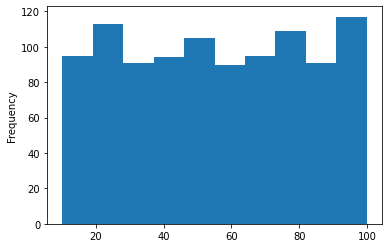

In [13]:
df['Unit price'].plot(kind="hist");

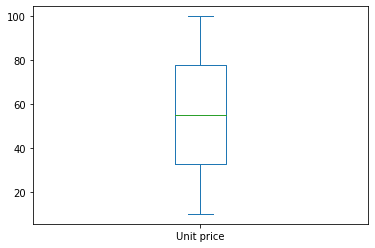

In [14]:
df['Unit price'].plot(kind="box");

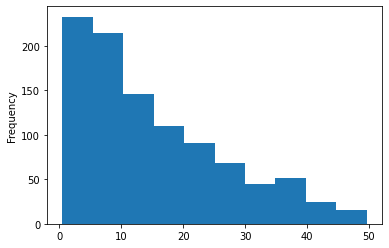

In [15]:
df['Tax 5%'].plot(kind="hist");

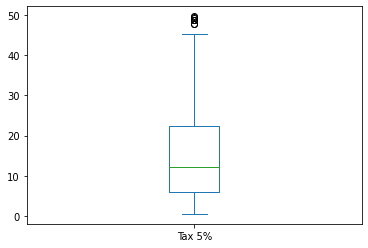

In [16]:
df['Tax 5%'].plot(kind="box");

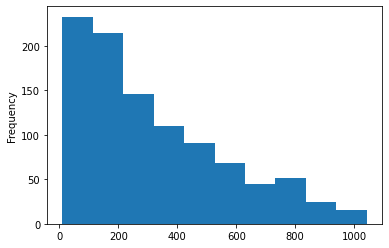

In [17]:
df['Total'].plot(kind="hist");

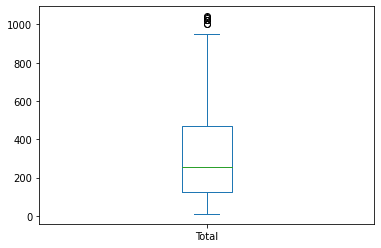

In [18]:
df['Total'].plot(kind="box");

In [19]:
df['Quantity'].value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

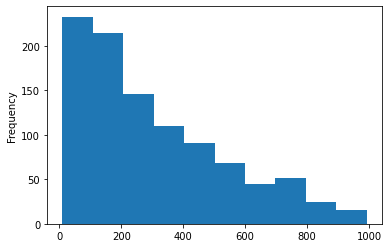

In [20]:
df['cogs'].plot(kind="hist");

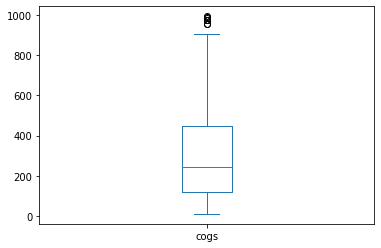

In [21]:
df['cogs'].plot(kind="box");

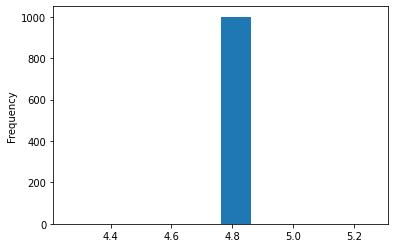

In [22]:
df['gross margin percentage'].plot(kind="hist");

In [23]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

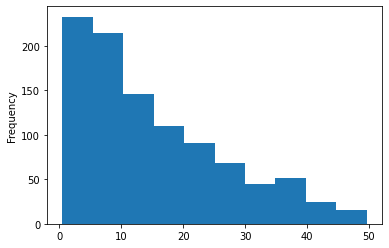

In [24]:
df['gross income'].plot(kind="hist");

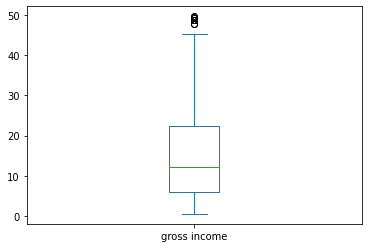

In [25]:
df['gross income'].plot(kind="box");

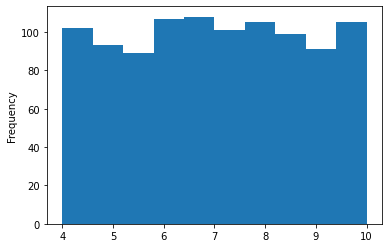

In [26]:
df['Rating'].plot(kind="hist");

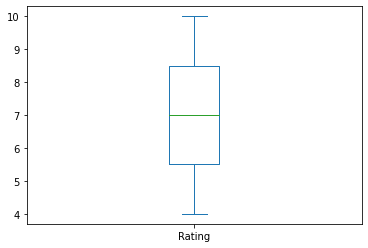

In [27]:
df['Rating'].plot(kind="box");

In [28]:
df[(df['Tax 5%'] != df['gross income'])].shape[0]

0

Как мы видим, атрибуты `Tax 5%` и `gross income` полностью совпадают. Также важно отметить, что поле `gross margin percentage` является константным и имеет одинаковое значение для всех записей. 

## Выводы:

- date и time являются строками, хотя по факту это велечины времени
- date и time из строк привести в необходимый формат, достаточного одного поля
- создать поле datetime 
- каждый филиал находится только в одном городе
- поля `Customer type` и `Gender` зависят только от заказа, однако в будущем может появиться сущность `Клиент/Покупатель
- отсутствует сущность `Продукт`, но может появиться в будущем
- gross income совпадает с Tax 5%
- gross margin percentage - константа, одинаковая для всех записей